In [6]:
!pip install opencv-python

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/maria_sharapova_203-mobile.jpg')

In [4]:
img.shape

(768, 768, 3)

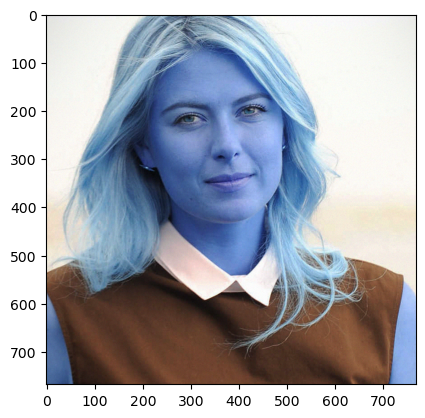

In [5]:
plt.imshow(img)

In [6]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
grey.shape

(768, 768)

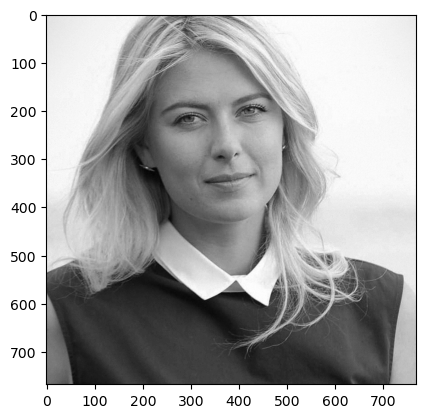

In [8]:
plt.imshow(grey, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

In [10]:
faces = face_cascade.detectMultiScale(grey)

In [11]:
faces

array([[203,  85, 326, 326],
       [502, 462, 133, 133]])

In [12]:
(x,y,w,h) = faces[0]

In [13]:
x,y,w,h

(203, 85, 326, 326)

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

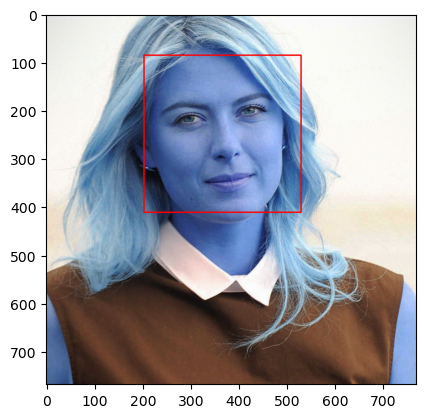

In [15]:
plt.imshow(face_img)

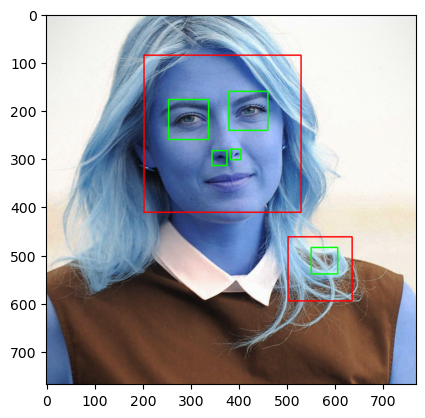

In [16]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grey[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

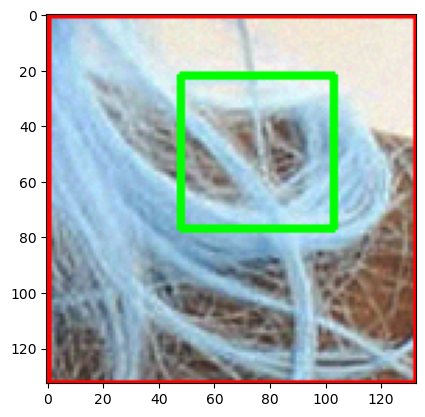

In [17]:
plt.imshow(roi_color, cmap='gray')

In [18]:
roi_color

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [118, 173, 218],
        ...,
        [237, 235, 217],
        [237, 228, 224],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [ 88,  83,  80],
        ...,
        [164, 169, 170],
        [181, 180, 189],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [123, 106, 103],
        ...,
        [135, 134, 136],
        [141, 149, 149],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            plt.imshow(roi_color)
            return roi_color

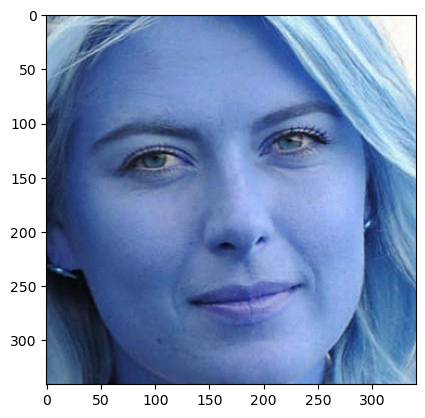

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/maria_sharapova_203-mobile.jpg')

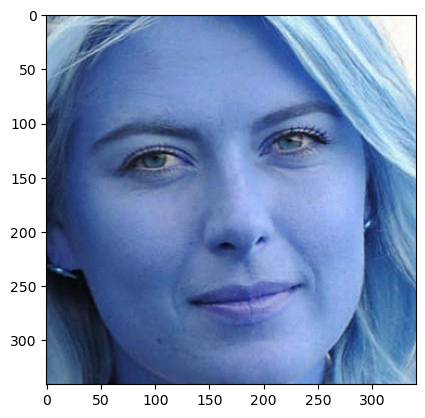

In [21]:
plt.imshow(cropped_image)

In [22]:
path_to_data = "./Dataset/"
path_to_cropped_data = "./Dataset/cropped/"

In [23]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./Dataset/cropped',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/virat_kohli']

In [24]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [25]:
path_to_cropped_data

'./Dataset/cropped/'

cropped
lionel_messi
Generating cropped images in folder:  ./Dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./Dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./Dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./Dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./Dataset/cropped/virat_kohli


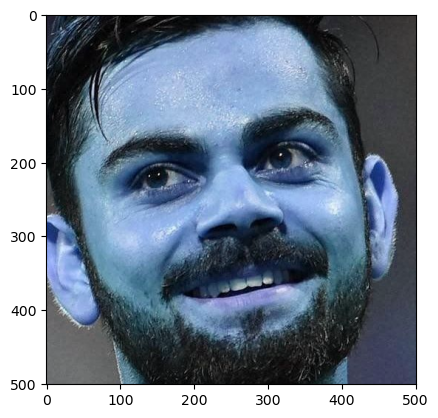

In [28]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1

In [29]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

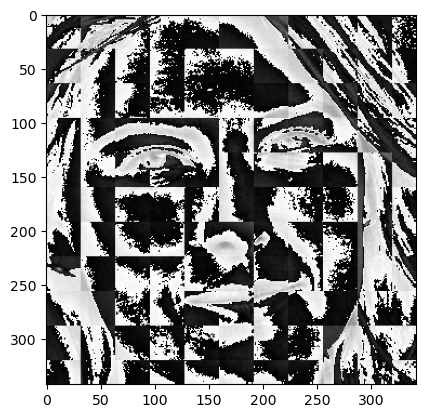

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [41]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./Dataset/cropped/lionel_messi\\lionel_messi1.png',
  './Dataset/cropped/lionel_messi\\lionel_messi10.png',
  './Dataset/cropped/lionel_messi\\lionel_messi11.png',
  './Dataset/cropped/lionel_messi\\lionel_messi12.png',
  './Dataset/cropped/lionel_messi\\lionel_messi14.png',
  './Dataset/cropped/lionel_messi\\lionel_messi15.png',
  './Dataset/cropped/lionel_messi\\lionel_messi16.png',
  './Dataset/cropped/lionel_messi\\lionel_messi17.png',
  './Dataset/cropped/lionel_messi\\lionel_messi18.png',
  './Dataset/cropped/lionel_messi\\lionel_messi19.png',
  './Dataset/cropped/lionel_messi\\lionel_messi2.png',
  './Dataset/cropped/lionel_messi\\lionel_messi20.png',
  './Dataset/cropped/lionel_messi\\lionel_messi21.png',
  './Dataset/cropped/lionel_messi\\lionel_messi22.png',
  './Dataset/cropped/lionel_messi\\lionel_messi23.png',
  './Dataset/cropped/lionel_messi\\lionel_messi24.png',
  './Dataset/cropped/lionel_messi\\lionel_messi25.png',
  './Dataset/cropped/lionel_messi\

In [42]:
celebrity_file_names_dict.keys()

dict_keys(['lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli'])

In [43]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [54]:
del class_dict['cropped']

In [36]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [44]:
X = []
Y = []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        Y.append(class_dict[celebrity_name])

In [45]:
len(X)

209

In [46]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(209, 4096)

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.8113207547169812

In [49]:
len(X_test)

53

In [50]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.67      0.91      0.77        11
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         8
           4       1.00      0.78      0.88         9

    accuracy                           0.81        53
   macro avg       0.86      0.79      0.80        53
weighted avg       0.85      0.81      0.81        53



In [51]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=1),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833266,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.737097,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.865121,{'logisticregression__C': 1}


In [55]:
best_estimators['svm'].score(X_test,Y_test)

0.8490566037735849

In [54]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.8490566037735849

In [56]:
best_clf = best_estimators['logistic_regression']

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[12,  0,  1,  0,  0],
       [ 1, 10,  0,  0,  0],
       [ 0,  0, 11,  1,  0],
       [ 0,  3,  0,  5,  0],
       [ 0,  0,  0,  2,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

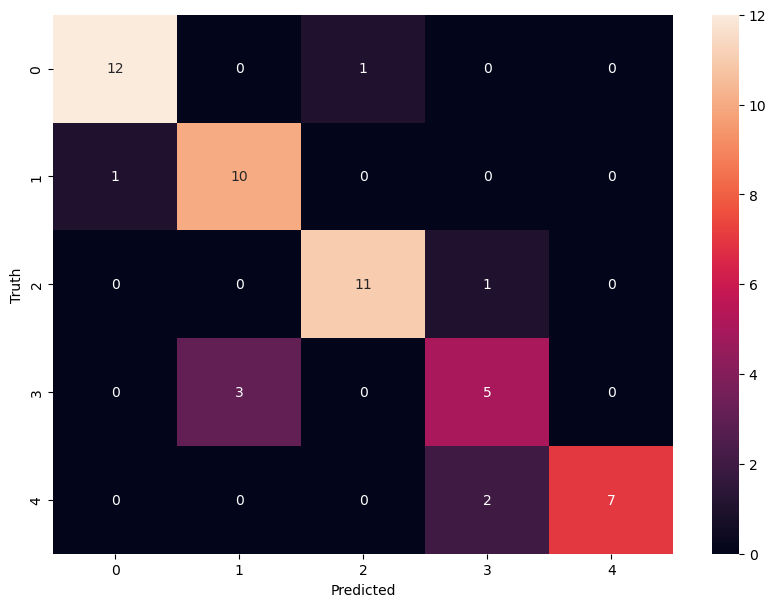

In [58]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [60]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))